In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

## Neuron without activation - Regression/Linear Model


### Regression/Linear Model

The function implemented by a neuron with no activation, linear regression:
$$ f\_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$


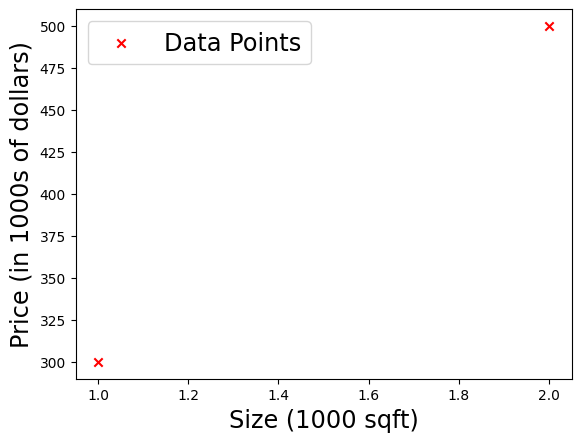

In [4]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  # (size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)  # (price in 1000s of dollars)

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax.legend(fontsize="xx-large")
ax.set_ylabel("Price (in 1000s of dollars)", fontsize="xx-large")
ax.set_xlabel("Size (1000 sqft)", fontsize="xx-large")
plt.show()

In [20]:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")
a1 = linear_layer(X_train[0].reshape(1, 1))
w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[0.37276542]], b=[0.]
tf.Tensor(
[[0.37276542]
 [0.74553084]], shape=(2, 1), dtype=float32)


In [21]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [22]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [23]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

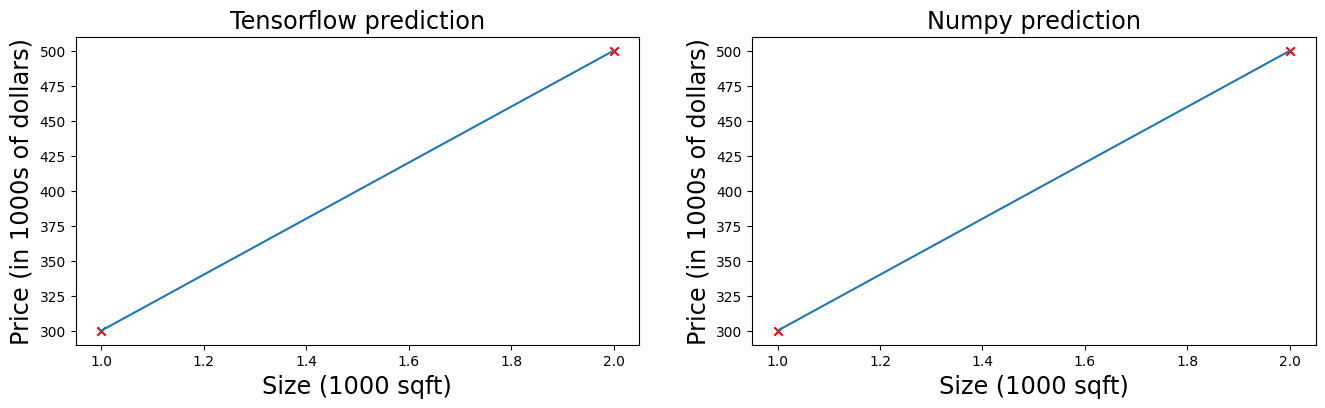

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax[0].plot(X_train, prediction_tf, label="model output")
ax[0].set_ylabel("Price (in 1000s of dollars)", fontsize="xx-large")
ax[0].set_xlabel("Size (1000 sqft)", fontsize="xx-large")
ax[0].set_title("Tensorflow prediction", fontsize="xx-large")

ax[1].scatter(X_train, Y_train, marker="x", c="r", label="Data Points")
ax[1].plot(X_train, prediction_np, label="model output")

ax[1].set_ylabel("Price (in 1000s of dollars)", fontsize="xx-large")
ax[1].set_xlabel("Size (1000 sqft)", fontsize="xx-large")
ax[1].set_title("Numpy prediction", fontsize="xx-large")
plt.show()

## Neuron with Sigmoid activation

The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression:
$$ f\_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$


In [33]:
X_train = np.array([0.0, 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix
Y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1, 1)  # 2-D Matrix

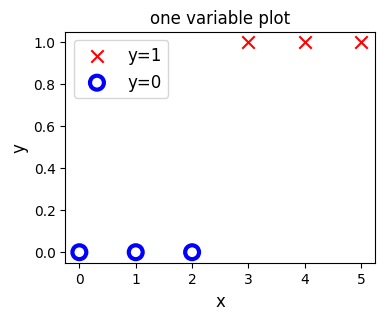

In [41]:
pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker="x", s=80, c="red", label="y=1")
ax.scatter(
    X_train[neg],
    Y_train[neg],
    marker="o",
    s=100,
    label="y=0",
    facecolors="none",
    edgecolors="b",
    lw=3,
)

ax.set_ylabel("y", fontsize=12)
ax.set_xlabel("x", fontsize=12)
ax.set_title("one variable plot")
ax.legend(fontsize=12)
plt.show()

In [42]:
model = Sequential(
    [tf.keras.layers.Dense(1, input_dim=1, activation="sigmoid", name="L1")]
)

model.summary()

/home/ahmed/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
logistic_layer = model.get_layer("L1")
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)
print(logistic_layer.get_weights())

[[2.]] [-4.5]
(1, 1) (1,)
[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [55]:
a1 = model.predict(X_train[0].reshape(1, 1))
print(a1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.01098694]]
